<a href="https://colab.research.google.com/github/angelome/python_financial/blob/main/VaR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Portfolio Value at Risk and Conditional Value at Risk

In [14]:
import time
import numpy as np
import numpy.random as npr
import pandas as pd
import scipy.stats as scs
from scipy.stats import norm
import matplotlib.pyplot as plt

I use normal distributions to simulate asset returns

In [16]:
S0 = 100
r = 0.05
sigma = 0.25
T = 30 / 365.
I = 10000
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * npr.standard_normal(I))
R_gbm = np.sort(ST - S0)

I show the histogram of the simulated absolute performance values

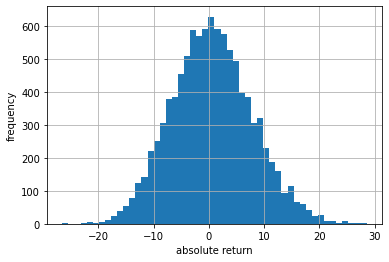

In [17]:
plt.hist(R_gbm, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency')
plt.grid(True)

We have to define the percentiles (in percent values) in which we are interested.

0.1 translates into a confidence level of 100% – 0.1% = 99.9%.

The 30-day VaR, given a confidence level of 99.9% in this case is 20.4 currency units, while it is 8.7 at the 90% confidence level:

In [18]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_gbm, percs)
print ('%16s %16s' % ('Confidence Level', 'Value-at-Risk'))
print (33 * '-')
for pair in zip(percs, var):
  print ('%16.2f %16.3f' % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           26.354
           99.90           19.945
           99.00           15.349
           97.50           13.126
           95.00           11.048
           90.00            8.748
